## Multi Layer Perceptron Classifier 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
X = df.drop(['Type'], axis = 1).values
y = df[['Type']].values
print(X)

print(y)

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)
classifier = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)
new_input = [[1.51773,14.28,0,1.92,73.56,0,8.63,1.65,0]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the glass type",new_y)

The predict y value is that is the glass type [6]


In [11]:
print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix is 
[[12  2  0  0  0  0]
 [ 4 13  1  1  2  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  7]]


Confusion matrix, without normalization
[[12  2  0  0  0  0]
 [ 4 13  1  1  2  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  7]]
Normalized confusion matrix
[[0.85714286 0.14285714 0.         0.         0.         0.        ]
 [0.19047619 0.61904762 0.04761905 0.04761905 0.0952381  0.        ]
 [0.75       0.25       0.         0.         0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.        ]
 [0.         0.         0.         0.33333333 0.66666667 0.        ]
 [0.         0.         0.         0.         0.125      0.875     ]]


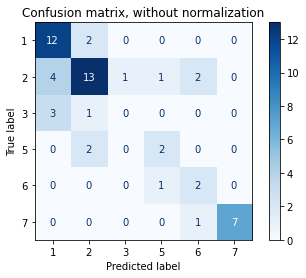

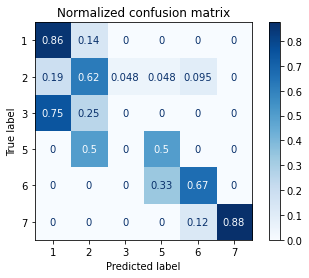

In [13]:
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix",'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [14]:
print(classification_report(y_test,y_pred))
print("\n")
print("==============================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")
print("==============================")
print(len(mlp.intercepts_))
print(mlp.intercepts_)

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.72      0.62      0.67        21
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       0.40      0.67      0.50         3
           7       1.00      0.88      0.93         8

    accuracy                           0.67        54
   macro avg       0.54      0.59      0.55        54
weighted avg       0.65      0.67      0.65        54



5
[array([[-0.83626891, -1.10410165],
       [ 0.60983276,  0.79073023],
       [ 0.65599721, -0.50956898],
       [-1.54266083,  0.78802334],
       [ 0.42847744,  0.61729609],
       [-1.43305509, -0.78428138],
       [ 0.22609777,  0.59388509],
       [ 0.01715347,  0.94024546],
       [-0.97528335, -0.67527581]]), array([[ 1.72808846e+00, -8.79556355e-15, -1.95112594e-21,
        -2.86422598e-01,  1.10508135e+00],
       [ 2.39715912e-01, -1.32415

## Decision Tree Classifier 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

feature_cols = ['RI', 'Na', 'Mg', 'Al','Si','K', 'Ca', 'Ba', 'Fe']
X = df[feature_cols] 
Y = df['Type'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))


Accuracy for 70% training set and 30% test set : 0.7076923076923077


In [32]:
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(20,20))

tree.plot_tree(clf, 
                   feature_names=df.feature_names,  
                   class_names=df.target_names,
                   filled=True)


|--- feature_7 <= 0.34
|   |--- feature_3 <= 1.42
|   |   |--- feature_6 <= 10.48
|   |   |   |--- feature_0 <= 1.52
|   |   |   |   |--- feature_0 <= 1.52
|   |   |   |   |   |--- feature_3 <= 0.73
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_3 >  0.73
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  1.52
|   |   |   |   |   |--- feature_4 <= 72.72
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_4 >  72.72
|   |   |   |   |   |   |--- feature_4 <= 72.88
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_4 >  72.88
|   |   |   |   |   |   |   |--- feature_3 <= 1.25
|   |   |   |   |   |   |   |   |--- feature_6 <= 8.87
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_6 >  8.87
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |--- feature_3 >  1.25
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |--- feat

AttributeError: 'DataFrame' object has no attribute 'feature_names'

<Figure size 1440x1440 with 0 Axes>

## Gaussian Naive Bayes Classifier 

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train1,y_train1)

C:\Users\DEAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [41]:
model.score(X_test1, y_test1)

0.5230769230769231

In [43]:
model.predict(X_test1[:10])

array([7, 1, 1, 5, 5, 1, 1, 1, 6, 6], dtype=int64)